In [29]:
import pandas as pd

df = pd.read_csv("./romanian_political_articles_v1.csv")
df.info()
df.describe(include='all')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4691 entries, 0 to 4690
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   url            4691 non-null   object
 1   title          4691 non-null   object
 2   date_publish   4688 non-null   object
 3   description    4621 non-null   object
 4   maintext       4691 non-null   object
 5   source_domain  4691 non-null   object
 6   authors        4218 non-null   object
dtypes: object(7)
memory usage: 256.7+ KB


,url,title,date_publish,description,maintext,source_domain,authors
0,https://www.realitatea.net/stiri/politica/ion-...,Ion Cristoiu: Ilie Bolojan și rețeaua sa duc o...,2025-04-08 08:38:37,Ilie Bolojan si reteaua sa duc o politica anti...,"""Domnul Sprînceană a intervenit, nu știu ce l-...",www.realitatea.net,Realitatea.NET
1,https://www.realitatea.net/stiri/politica/scan...,Scandalurile prin care a devenit celebru candi...,2025-04-13 13:09:59,Tupeu incredibil din partea lui Nicusor Dan! S...,Activistă și ea din zona soroșistă ce a venit ...,www.realitatea.net,Georgiana Balaban
2,https://www.realitatea.net/stiri/politica/crin...,"Crin Antonescu: „Nicușor dă prea puțină apă, P...",2025-04-12 20:54:54,",,Nicusor Dan da prea putina apa si Ponta prea...","Crin Antonescu: „Ei promit lapte și miere, dar...",www.realitatea.net,Georgiana Balaban
3,https://www.realitatea.net/stiri/politica/lasc...,Lasconi: „Nicușor Dan mi-a cerut să mă retrag ...,2025-04-12 19:02:32,",,Nicusor Dan mi-a cerut sa ma duc la Stejarii...",Candidata la prezidențiale trădată de propriul...,www.realitatea.net,Georgiana Balaban
4,https://www.realitatea.net/stiri/politica/adri...,Adrian Severin: „Încălcarea democrației schimb...,2025-04-13 10:28:52,Adrian Severin spune ca dreptul de a alege si ...,Adrian Severin: „În democrație nu poți închide...,www.realitatea.net,Georgiana Balaban


In [30]:
df.isnull().sum()
df = df.dropna(subset=["maintext", "source_domain"])

In [31]:
import re

def remove_quotes(text):
    return re.sub(r'"[^"]+"', '', text)

df['cleantext'] = df['maintext'].apply(remove_quotes)

In [32]:
df = df[df['cleantext'].str.split().str.len() > 100]

In [33]:
df['text_length'] = df['cleantext'].str.len()
df['text_length'].describe()

count     4003.000000
mean      2716.095678
std       2856.163127
min        544.000000
25%       1343.500000
50%       2020.000000
75%       3140.000000
max      53417.000000
Name: text_length, dtype: float64

<Axes: xlabel='source_domain'>

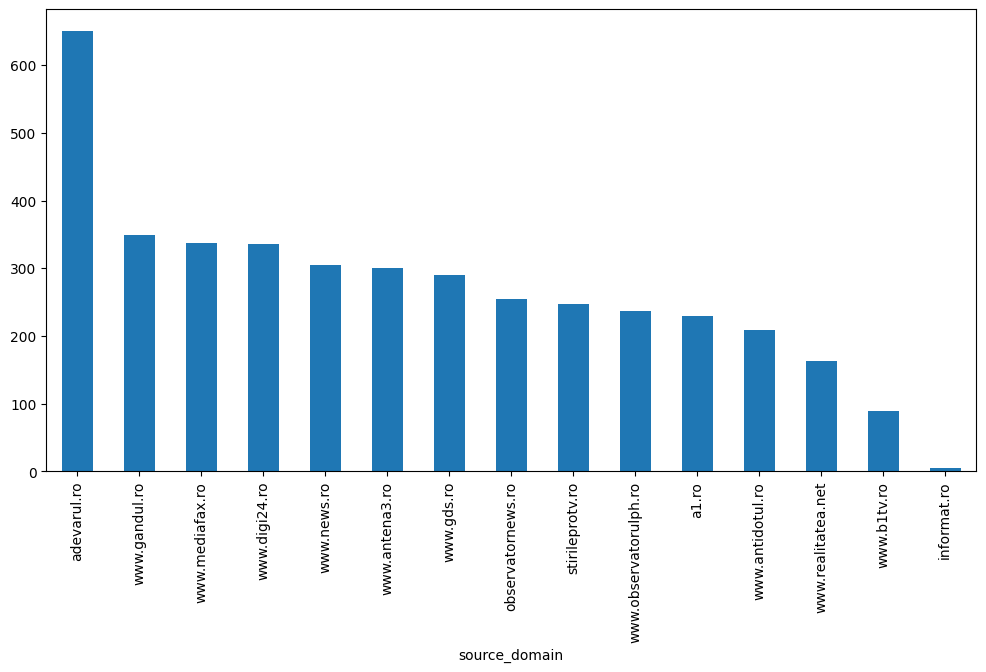

In [36]:
df['source_domain'].value_counts().plot(kind='bar', figsize=(12, 6))

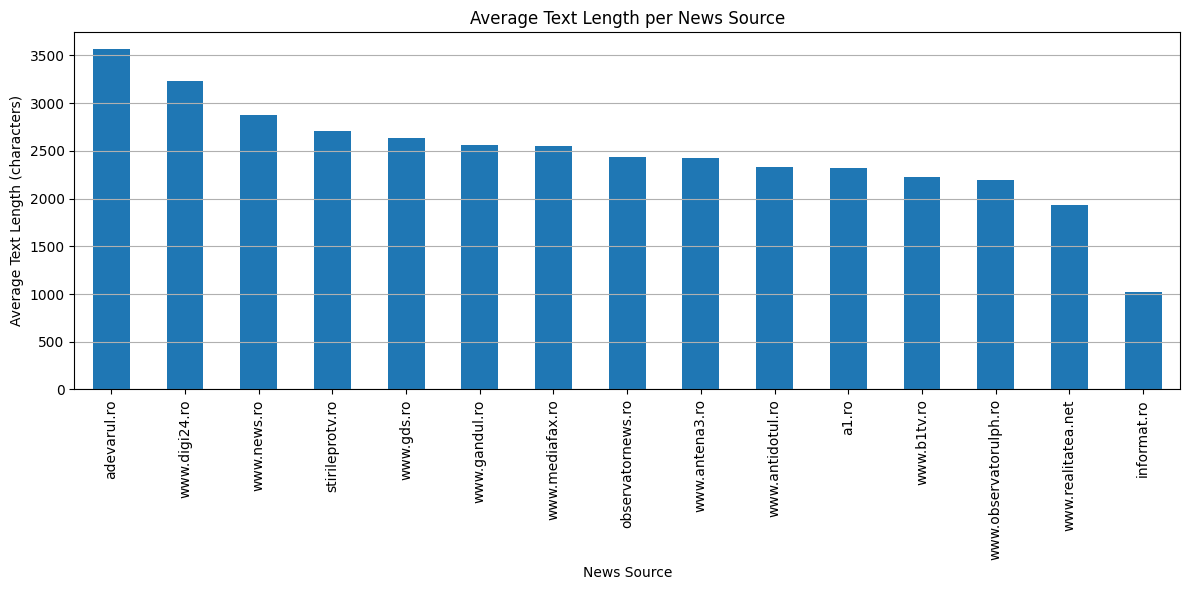

In [34]:
import matplotlib.pyplot as plt

# Group by source_domain and calculate average text length
avg_text_length = df.groupby("source_domain")["text_length"].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
avg_text_length.plot(kind="bar")
plt.title("Average Text Length per News Source")
plt.ylabel("Average Text Length (characters)")
plt.xlabel("News Source")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis="y")
plt.show()

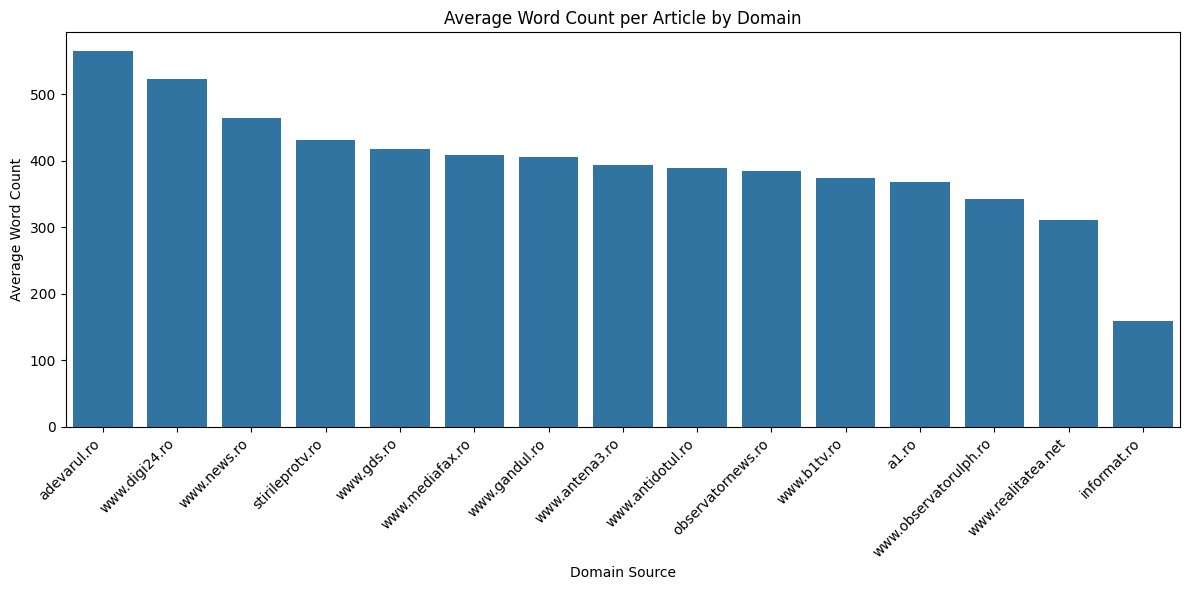

In [38]:
import seaborn as sns

df['word_count'] = df['cleantext'].str.split().apply(len)

avg_word_count = df.groupby('source_domain')['word_count'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_word_count.index, y=avg_word_count.values)

# Step 3: Beautify plot
plt.xticks(rotation=45, ha='right')
plt.xlabel("Domain Source")
plt.ylabel("Average Word Count")
plt.title("Average Word Count per Article by Domain")
plt.tight_layout()
plt.show()